# COGS 108 - Final Project 

# Overview

For my final project, I investigated a potential relationship between a restaurant's price designation on Yelp and their proportion of foodborne illness related violations. To do this, I calculated distributions of the aforementioned proportions along lines of price designation, and performed a t-test. After a t-test, I was able to conclude that no such relationship exists, within the context of provided datasets.

# Name & PID

- Name: Sebastian Dogaru
- PID: A14541910

# Research Question

*In North Carolina, is there a relationship between a restaurant's price designation on Yelp, and proportion of foodborne illness related violations?*

## Background and Prior Work

Due to the COVID-19 pandemic plaguing the world at large, now, more than ever, consumers are skeptical about the hygenic practices of the restaurants they frequent. In 2014, a report from the Center for Science in the Public Interest (CSPI) concluded that the average consumer is twice as likely to contract a foodborne illness eating at a restaurant than they are cooking their own food at home. However, this study failed to specify whether a consumer was more likely to contract food poisoning at certain restaurants, than they are at others. Along lines of restaurant pricing, the average consumer would likely assume that they are more likely to contract food poisoning eating at a fast-food restaurant, than they would be eating at a gourmet bistro. This conclusion is driven by perceptions of fast-food cleanliness, which have been reinforced by events such as the Chipotle E-Coli outbreak that infected thousands with food poisoning. (1,2)

Based on current research, these perceptions of fast-food cleanliness are largely incorrect. In another study performed by the CPSI, they determined that there was not a significant difference in health department inspection scores along lines of pricing. However, it is important to note that not all inspection scores are created equal, within the context of food poisoning. In North Carolina, which is the population of this project's dataset, there are eight different violation categories described in the 2009 Food Code. Only one of these categories covers the transmission of foodborne illness. So despite restaurants of all price ranges recieving similar total scores on average, it is entirely possible that restaurants of a particular price range may recieve more food-poisoning related violations than others. This research question of this project aims to explore this possibility. (1,3)

References (include links):
- 1) Time article on CSPI findings https://time.com/75810/which-will-make-you-sicker-four-star-v-fast-food/
- 2) Report on Chipotle E-Coli outbreak https://www.foodsafetynews.com/2020/04/chipotle-agrees-to-pay-25-million-federal-fine-for-role-in-some-outbreaks/
- 3) North Carolina Food Code https://ehs.ncpublichealth.com/faf/docs/foodprot/NC-FoodCodeManual-2009-FINAL.pdf

# Hypothesis


*In North Carolina, there does exist a positive relationship between a restaurant's price designation, and that restaurants proportion of foodborne illness related violations. That is to say, that more expensive restaurants have higher proportions of food-poisoning related violations than less-expensive restaurants. I believe this to be the case because more expensive restaurants are less likely to use frozen or pre-made foodstuffs than lower priced restaurants. This means they handle raw foods more frequently, which increases the chances of contamination within the kitchen.*

# Dataset(s)

#####  Dataset Name: yelp.csv
#####  Link to the dataset: Provided Health Inspection Dataset
#####  Number of observations: 3688

The yelp.csv dataset has 3688 observations, which consist of Yelp data for restaurants in North Carolina. Observations contain information on a restaurant's location, rating, price, and type of food. Basically, the standard information one could gather by visiting that restaurants Yelp page.

To be abundantly clear, each observation has the following variables : ['id', 'name', 'is_closed', 'rating', 'review_count', 'address1',
       'zip_code', 'latitude', 'longitude', 'price', 'phone', 'hotdogs',
       'sandwiches', 'pizza', 'tradamerican', 'burgers', 'mexican', 'grocery',
       'breakfast_brunch', 'coffee', 'chinese', 'italian', 'newamerican',
       'chicken_wings', 'delis', 'bars', 'salad', 'seafood', 'bbq', 'bakeries',
       'sushi']
       
Clearly, many variables are included, but the only ones that are relevant to this particular project are 'address1' and 'price'. This data will be used to assign each restaurant, and eventually their violations, to a particular price range. The 'address1' variable is used to refer to a particular restaurant, rather than the restaurants name, to avoid the duplicate edge case.



#####  Dataset Name: violations.csv
##### Link to the dataset: Provided Health Inspection Dataset
##### Number of observations: 189802

The violations.csv dataset contains data on violations recorded during food inspections in North Carolina. Each observation consists of a particular violation (there can be more than one violation at an inspection) recorded during food inspections. The data contained in an observation contains, but is not limited to: the date of inspection, restaurant id, the violation code, and other related data.

To be abundantly clear, each observation has the following variables: ['X.objectid', 'hsisid', 'inspectdate', 'category', 'statecode',
       'critical', 'questionno', 'violationcode', 'severity', 'shortdesc',
       'inspectedby', 'comments', 'pointvalue', 'observationtype',
       'violationtype', 'count', 'cdcriskfactor', 'cdcdataitem']

Of these variables, the only ones that will be used in this project are: ['hsisid','violationcode']. The variable 'hsisid' is a particular restaurants unique id. The variable 'violationcode' refers to the type of violation a restaurant was charged with, for a given violation. These variables will be used to keep track of violations, by restaurant.



##### Dataset Name: inspections.csv
##### Link to the dataset: Provided Health Inspection Dataset
##### Number of observations: 18466

The inspections.csv dataset has 18466 observations, where each observation contains data from a particular food inspection performed in North Carolina between the years 2012 and 2016. This data contains information such as the restaurant inspected, location, the name of the inspector, inspection score, and the results of the inspection. 

To be abundantly clear, each observation has the following variables: ['hsisid', 'date', 'name', 'address1', 'address2', 'city', 'state',
       'postalcode', 'phonenumber', 'restaurantopendate',
       'days_from_open_date', 'facilitytype', 'x', 'y', 'geocodestatus', 'zip',
       'type', 'description', 'inspectedby', 'inspection_num', 'inspector_id',
       'previous_inspection_date', 'days_since_previous_inspection',
       'previous_inspection_by_same_inspector', 'score', 'num_critical',
       'num_non_critical', 'num_critical_previous',
       'num_non_critical_previous', 'num_critical_mean_previous',
       'num_non_critical_mean_previous', 'avg_neighbor_num_critical',
       'avg_neighbor_num_non_critical', 'top_match', 'second_match',
       'critical']
       
Many variables are included, but most of them do not contain information that pertains to the research question of this project. The only variables that will be used are : ['hsisid', 'address1'], which will be used to lookup each restaurants unique id 'hsisid' based on their address. This will allow us to determine a restaurants unique id by looking up addresses from the Yelp set.

###### A note on merging datasets:
The three datasets, yelp.csv, violations.csv and inspections.csv will be merged into one dataset, by performing two seperate inner joins. The first inner join will be between Yelp.csv and inspections.csv, on the 'address1' variable. A second inner join will be done on the result of the first, on the 'hsisid' variable. 


# Setup

In [69]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# Data Cleaning

First, I read in the three dataset csv files into respective DataFrames.

In [70]:
violations = pd.read_csv('violations.csv')
inspections = pd.read_csv('inspections.csv')
yelp = pd.read_csv('yelp.csv')

I then got rid of unnecessary variables from each dataset, as outlined in the Datasets section. Also checked the head of each dataset to ensure that the correct variables were maintained.

In [71]:
violations = violations.drop(columns=[x for x in violations.columns if x not in ['hsisid','violationcode']])
violations.head()

,hsisid,violationcode
0,4092015279,7-102.11
1,4092014572,7-102.11
2,4092015906,7-102.11
3,4092013840,7-102.11
4,4092021788,7-102.11


In [72]:
inspections = inspections.drop(columns=[x for x in inspections.columns if x not in ['hsisid','address1']])
inspections.head()

,hsisid,address1
0,4092013748,3000 New Bern Ave
1,4092014046,1030-149 N Rogers Ln
2,4092015191,6209 ROCK QUARRY RD
3,4092016122,1065 Darrington DR
4,4092021513,841 E Gannon AVE


In [73]:
yelp = yelp.drop(columns=[x for x in yelp.columns if x not in ['price','address1']])
yelp.head()

,address1,price
0,2400 John Brantley Blvd,$$
1,2303 NW Maynard Rd,$
2,Crabtree Valley Mall,$
3,3401 Raleigh Rd Pkwy W,$$
4,4934 Raleigh Rd,$


After reducing the datasets down to the relevant variables, it became necessary to drop all duplicate rows from the Yelp and Inspections datasets. The logic behind this decision is that it didnt make sense to have multiple rows describing the same restaurant (address) price, or restaurant (address) hsisid relationships. Duplicates were necessary to keep in the violations dataset, however, since a restaurant can be subject to the same violation on multiple occasions.

I also went ahead and dropped all NA rows at this step.

In [74]:
yelp = yelp.drop_duplicates()
inspections = inspections.drop_duplicates()

yelp = yelp.dropna()
inspections = inspections.dropna()
violations = violations.dropna()

Unfortunately, the provided datasets were dirty and needed cleaning. Specifically, the price column in the Yelp dataset was filled with garbage values. To remedy this, I checked the unique values of each column, in order to locate garbage/ NA values that could interfere with my analysis. Rows with garbage values were removed from their respective datasets.

In [75]:
yelp['price'].unique()

array(['$$', '$', '$$$', '$$$$', '19198407700', '18775769464',
       '19194811105', '19196150592', '19192666118', '19108685071',
       '19198469808', '19199869521', '19194660308', '19194660360',
       '19198884887', '19194607025', '19194692122', '19194899364',
       '19195827000', '19193870228', '19197843100', '19198217991',
       '19106926261', '19198217400', '19198320501', '19196000870',
       '19198824629', '19195214445', '19198484906', '19198500891',
       '19194362246', '19197793900', '19197822594', '19198344000',
       '19198213111', '19194250800', '19195526154', '19198473548'],
      dtype=object)

In [76]:
# only '$,$$,$$$,$$$' are wanted... get rid of the rest
yelp = yelp[(yelp['price'] == '$') | (yelp['price'] == '$$') | (yelp['price'] == '$$$')| (yelp['price'] == '$$$$')]

# and check unique values
yelp['price'].unique()

array(['$$', '$', '$$$', '$$$$'], dtype=object)

In [77]:
yelp.shape

(2630, 2)

Unfortunately, matplotlib encounters an issue when dollar signs are used as values for the price variable. Dollar signs also arent very descriptive, so I went ahead and replaced dollar signs as follows. I've included the corresponding price ranges symbolized by the dollar signs for further clarity.

One dollar sign (under 10 dollars)  => Tier 1       

Two dollar signs (between 11 and 30 dollars) => Tier 2

Three dollar signs (between 31 and 60 dollars) => Tier 3

Four dollar signs (over 60 dollars) => Tier 4

In [78]:
yelp['price'].value_counts()

$$      1288
$       1218
$$$      104
$$$$      20
Name: price, dtype: int64

In [79]:
def convertPrice(price):
    if price == '$':
        return 'Tier 1'
    elif price == '$$':
        return 'Tier 2'
    elif price == '$$$':
        return 'Tier 3'
    return 'Tier 4'

In [80]:
yelp['price'] = yelp['price'].map(convertPrice)

In [81]:
yelp['price'].value_counts()

Tier 2    1288
Tier 1    1218
Tier 3     104
Tier 4      20
Name: price, dtype: int64

In [82]:
yelp['price'].unique()

array(['Tier 2', 'Tier 1', 'Tier 3', 'Tier 4'], dtype=object)

For good measure, I checked all the unique values of violationcodes as well, just to make sure that no garbage values were present.

In [83]:
# only show first 10 entries, for sake of readability
violations['violationcode'].unique()[:10]

array(['7-102.11', '3-302.12', '7-201.11', '2-201.11(D)(F)', '6-501.18',
       '7-204.11', '4-204-112', '6-501.19', '3-501.13', '3-201.11'],
      dtype=object)

Next, I attempted to perform an inner join on the Yelp and Inspections datasets. The goal of this was to obtain a dataset where every restaurant was assigned an id and a pricepoint by matching Yelp addresses to inspection addresses. Unfortunately, the first attempt at inner joining had a noticable issue regarding the number of observations. 

In [84]:
# First, join yelp and inspection datasets on address1
result = yelp.merge(inspections, how='inner', on='address1')

# possible for multiple inspections at a single restaurant, so drop duplicates
result = result.drop_duplicates()
result.head()

,address1,price,hsisid
0,4431 New Bern Ave,Tier 1,4092021291
1,4431 New Bern Ave,Tier 1,4092014118
2,2080 Kildaire Farm Rd,Tier 2,4092013761
3,4325 Glenwood Ave,Tier 1,4092021272
4,4325 Glenwood Ave,Tier 1,4092012279


In [85]:
result.shape

(134, 3)

As you can see, the result of an inner join between the yelp dataset and the inspection dataset yields a result with only 134 entries, when both of the individual datasets had thousands, respectively. I tried again, this time making all restaurant addresses lowercase, so that matches aren't rejected due to case difference.

In [86]:
inspections['address1'] = inspections['address1'].map(lambda x: x.lower())
yelp['address1'] = yelp['address1'].map(lambda x: x.lower())

In [87]:
result = yelp.merge(inspections, how='inner', on='address1')
result.shape

(1493, 3)

1493 is a much more acceptable number, meaning that we were able to find inspection data for 1493 of the 2630 observations in the Yelp dataset. I believe this is to be expected, since the provided datasets are not comprehensive. 

Finally, I inner joined this result dataset with the violations dataset. After inner joining, I went ahead and removed the address column, since this is potentially sensitive and redundant information. Since each restaurant has an ID, we dont need its address as an identifier. This yielded a dataset where each observation is ['price', 'hsisid','violation']. 

In [88]:
restaurant_pricing_violations = violations.merge(result, how='inner', on='hsisid')
restaurant_pricing_violations = restaurant_pricing_violations.drop(['address1'], axis=1)
restaurant_pricing_violations.head(10)

,hsisid,violationcode,price
0,4092010287,7-102.11,Tier 2
1,4092010287,3-603.11,Tier 2
2,4092010287,3-603.11,Tier 2
3,4092010287,2-103.11(M),Tier 2
4,4092010287,3-302.12,Tier 2
5,4092010287,3-302.12,Tier 2
6,4092010287,3-302.12,Tier 2
7,4092010287,3-501.15,Tier 2
8,4092010287,3-501.15,Tier 2
9,4092010287,5-501.114,Tier 2


In [89]:
restaurant_pricing_violations.shape

(81386, 3)

This dataset is ready to be used to explore the relationship between the proportion of foodborne illness related violations and a restaurants price range!

##### Data Cleaning Questions:

##### How 'clean' is the data?
- The Data was very clean for the most part. There were quite a few observations with NAN values, but those weren't very hard to deal with. The biggest issue I encountered was the presence of random garbage values in the Yelp dataset, specifically the price column. However, since price values are a predefined set, it wasn't very difficult to detect garbage and remove those observations. Another issue I faced was inconsistency in address typing. Addresses in one dataset would be all caps, and lowercase in another. This prevented me from joining tables on addresses, intitally, since python string comparisons are case sensitive. To remedy this, I made all addresses lowercased.

##### What did you have to do to get the data into a usable format? (If you did nothing, how did you determine there was nothing to do?)
- Since the data I needed was scattered across multiple tables, I had to drop redundant columns and perform appropriate inner joins between datasets. This allowed me to get the relevant information (restaurant pricing, id, and violation codes) consolidated into one dataset. As mentioned previously, joining the tables on addresses wasnt possible initially due to case senstivity and input inconsistency, so this required processing each address into lowercase before joining the tables.

###### What pre-processing steps that were required for your methods (for example, checking data distributions and performing any transformations that may be required)

- One pre-processing step that was required was to check the unique values of price in the Yelp dataset. This is what alerted me to the existence of garbage values in the dataset. I ended up dropping all rows from the dataset that didn't have a valid value. After that happened, I also checked the unique values of violationcodes; thankfully everything checked out. This type of processing wasn't necessary for addresses and ids, since garbage values would be discarded naturally when an inner join was performed.

- Another step of pre-processing that was required, as mentioned previously, was that I had to change all address strings to lowercase, so that I could join tables without having to worry about case sensitive comparisons.

- I also had to replace all dollar signs with descriptive strings for the price column, since matplotlib runs into issues when parsing dollar signs (something to do with LaTeX).


# Data Analysis & Results

#### A note on EDA: 
Much of the EDA on the provided datasets was done implicitly, while performing the cleaning and joins done in the previous section. However, it is still necessary to do EDA on the resulting dataset, restaurant_pricing_violations.

I began by looking at the variables, and their types in this dataset.

In [90]:
restaurant_pricing_violations.dtypes

hsisid            int64
violationcode    object
price            object
dtype: object

As discussed previously, hsisid is a unique identifier assigned to a particular restaurant. This id is used when assigning violations to a particular restaurant. The violation code is the specific violation a restaurant was charged with. Price is one of the four pricing categories established in the previous section.

In [91]:
restaurant_pricing_violations.head(5)

,hsisid,violationcode,price
0,4092010287,7-102.11,Tier 2
1,4092010287,3-603.11,Tier 2
2,4092010287,3-603.11,Tier 2
3,4092010287,2-103.11(M),Tier 2
4,4092010287,3-302.12,Tier 2


As you can see, the same hsisid and price are repeated in the head of the dataset. Is something wrong? No. Each row of the dataset represents a particular violation a restaurant was assigned. A restaurant can have multiple violations, and multiple violations with the same code, so we can rest assured that theres nothing wrong with our dataset.

Next I took a look at the shape of the dataset, just so I knew how many observations I was working with.

In [92]:
restaurant_pricing_violations.shape

(81386, 3)

Now for graphs. The data in this dataset is not numerical, so line graphs, scatterplots and other measures of relation between numerical variables dont quite apply.

However, I wanted to see the relationship between Pricing Categories and the number of observations in the dataset.

I decided to take a look at the number of violations by price category, to see if there were any glaring differences by category, or if everything was uniform. Before doing this, I would need to filter out all entries with non-food poisoning related violations, since this project pertains to foodborn illness violations. I did this by dropping all rows in which the violation code did not begin with 3, since 3 is the code for food related violations.

In [93]:
foodborne_violations = restaurant_pricing_violations[[i.startswith('3') for i in restaurant_pricing_violations['violationcode']]]

Text(0.5, 0, 'Price Category')

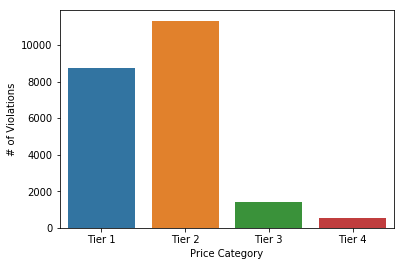

In [94]:
# total number of recorded violations by price range of restaurant
x = foodborne_violations['price'].value_counts()
viz1 = sns.barplot(x.index,x.values,order=['Tier 1','Tier 2','Tier 3','Tier 4'])

viz1.set_ylabel('# of Violations')
viz1.set_xlabel('Price Category')

This visualization plots the total number of foodborne illness related violations, by restaurant price category. As you can see, the cheaper categories Tier 2 and Tier 1 have significantly more foodborne illness related violations than their more expensive counterparts Tier 3 and Tier 4. So why are there so many more violations for lower priced restaurants? Can we already jump to the conclusion that you're more likely to get food poisoning at a cheaper restaurant? Not quite. 

Next, I generated a plot that depicts the number of restaurants in each category. To do this, I used the results table from the previous portion, since restaurants are not duplicated across observations in that table. I then grouped by price.

Text(0.5, 0, 'Price Category')

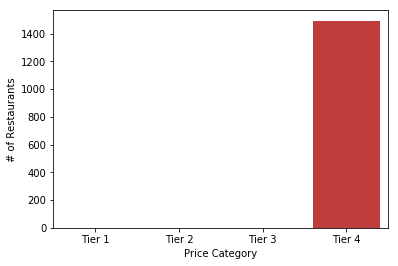

In [95]:
# redefine result
result['price'] = result['price'].map(convertPrice)

y = result.groupby(['price']).size()
viz2 = sns.barplot(y.index,y.values,order=['Tier 1','Tier 2','Tier 3','Tier 4'])
viz2.set_ylabel('# of Restaurants')
viz2.set_xlabel('Price Category')

This visualization plots the number of restaurants by price category. As you can see, there are significantly more Tier 1 and Tier 2 restaurants than there are Tier 3 and Tier 4 ones. This explains the discrepency in # of violations depicted by the first visualization. Since there are MANY more Tier 1 and 2 restaurants, those categories will naturally have more foodborne illness violations.

It is now abundantly clear that count alone will not be a sufficient metric for determining if there exists a relationship between price and foodborne illness related violations. Instead, we will use proportion of foodborne related violations by restaurant, averaged across price categories. 

Defined as the following, for each pricing Tier:

$\sum_{restaurants}$ $(# Food related violations)/(# Total Violations) )/ # restaurants in pricing category$

This will give us an accurate read on whether a particular pricing group has more foodborne illness related violations than the others, relatively speaking. This is irrespective of the difference in the total number of restaurants, across categories.

In [96]:
# make seperate dataframes by pricing tier
violations_tier1 = restaurant_pricing_violations[restaurant_pricing_violations['price'] == 'Tier 1']
violations_tier2 = restaurant_pricing_violations[restaurant_pricing_violations['price'] == 'Tier 2']
violations_tier3 = restaurant_pricing_violations[restaurant_pricing_violations['price'] == 'Tier 3']
violations_tier4 = restaurant_pricing_violations[restaurant_pricing_violations['price'] == 'Tier 4']

# generate proportion distributions of each tier
# to make code more readable, used a function
def gen_dist(df):
    unique_ids = df['hsisid'].unique()
    proportions = []
    
    for i in unique_ids:
        df2 = violations[violations['hsisid'] == i]
        proportions.append(len(df2[[j.startswith('3') for j in df2['violationcode']]])/ len(df2))
    
    return proportions
    
    
tier1_dist = gen_dist(violations_tier1)
tier2_dist = gen_dist(violations_tier2)
tier3_dist = gen_dist(violations_tier3)
tier4_dist = gen_dist(violations_tier4)

In [97]:
{'Tier 1': np.mean(tier1_dist), 'Tier 2':np.mean(tier2_dist), 'Tier 3': np.mean(tier3_dist), 'Tier 4': np.mean(tier4_dist)}

{'Tier 1': 0.24084639325669668,
 'Tier 2': 0.2578367424441911,
 'Tier 3': 0.2595421149445046,
 'Tier 4': 0.30105176043444193}

As you can see, Tier 4 restaurants have the highest rate of foodborne related violations, while Tier 1 restaurants have the lowest proportion. While it may be tempting to jump the gun and conclude that, shockingly, higher priced restaurants have a higher proportion of foodborne related violations, you shouldnt do this. To come to an accurate conclusion, further analysis is required. This is because the difference in proportions may be entirely due to chance. 

To test this, I performed a T test using the null distribution of proportion of foodborne related violations, irrespective of restaurant typing. For statistical significance, I used a benchmark of p-value < .01.

###### IMPORTANT:
It is important to note that the distributions originating from the restaurant_pricing_violations dataset are limited to the sample we took from the overall violations dataset (we only used violations from restaurants that had an observation in the Yelp dataset). So to generate an accurate null distribution, data on proportions must be drawn from the ENTIRE violations dataset.

In [98]:
# generate proportion of foodborne related violations for each restaurant in the dataset
unique_ids = violations['hsisid'].unique()

null_proportions = []
for i in unique_ids:
    df = violations[violations['hsisid'] == i]
    null_proportions.append(len(df[[j.startswith('3') for j in df['violationcode']]])/ len(df))

Text(0.5, 0, 'Proportion of foodborne illness related violations')

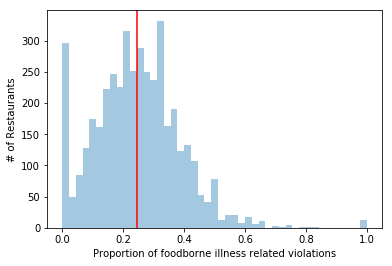

In [99]:
bins = np.arange(0,1,.025)
viz3 = sns.distplot(null_proportions, kde=False)
viz3.axvline(np.mean(null_proportions), color='red')

viz3.set_ylabel('# of Restaurants')
viz3.set_xlabel('Proportion of foodborne illness related violations')

This histogram depicts the NULL distribution of proportion of foodborne illness related violations in the entire violation dataset, irrespective of pricing. The x axis is the proportion, and the y axis is the number of restaurants that have a proportion that is similar to that (bin size .025).

In the context of the t-test, the main takeaway is that the mean of this distribution is a proportion of roughly .25. That is to say that, for the average restaurant (irrespective of price), 25% of their recorded violations are related to foodborne illness.

Now, we will compare the proportion distributions by pricing tier to the null distribution using a p-value test to determine if any of the samples taken by matching ids through Yelp addresses ( violations_tier1, violations_tier2, violations_tier3, violations_tier4 ) statistically could not have been randomly sampled from the null. That is to say that the differences in proportions across pricing tiers is not due to chance.

In [100]:
print("Tier 1 p-value: " + str(stats.ttest_ind(null_proportions,tier1_dist)[1]))
print("Tier 2 p-value: " + str(stats.ttest_ind(null_proportions,tier2_dist)[1]))
print("Tier 3 p-value: " + str(stats.ttest_ind(null_proportions,tier3_dist)[1]))
print("Tier 4 p-value: " + str(stats.ttest_ind(null_proportions,tier4_dist)[1]))

Tier 1 p-value: 0.37937389314359204
Tier 2 p-value: 0.03910858158429272
Tier 3 p-value: 0.3852134352380846
Tier 4 p-value: 0.03755658010546115


None of the p-values are less than .01, so we conclude that there is NOT a statistical difference between the distribution of proportion of foodborne illness related violations, by restaurant pricing, and the null distribution. That is to say that the proportion of foodborne illness related violations does not differ, in a statistically significant manner, across pricing categories. Because of this conlcusion, I officially reject my hypothesis, which predicted that restaurants in higher price categories would have higher proportions of foodborne illness related violations, since they handle more raw food.

#### Data Analysis & Results Questions:

#### EDA


###### What distributions do your variables take?
- Most of the observations belong to Tier 1 and Tier 2 restaurants. Tier 3 and Tier 4 are much less common. Other distributions to note are the null distribution of proportions of foodborne illness, depicted above, and the distributions by pricing category, which were statistically proven to originate from this null distribution.

###### Are there any outliers?
- The amount of Tier 4 restaurants relative to the other tiers can be considered an outlier, since the difference is so large. Also, when looking at the null distribution of proportions of foodborne illness, there are a couple outliers in the 1.0 bin. This isn't significant, but fun to note - there exists restaurants that have ONLY had violations related to foodborne illness... yikes!

##### Relationship between variables?
- A trivial relationship between variables is that each hsisid has only one pricing category across all observations. Other than that, thanks to the results of the t-test, I was unable to prove any other relationships between variables.


##### Analysis:
###### What approaches did you use? Why?
- Half way through the analysis, I discovered that the proportions of foodborne illness related violations were not even across pricing categories, and that more expensive restaurants (tier 4) had a higher proportion. However, in order to check that these results were statistically significant, I used a t-test to check if the differences in proportion were due to chance, and that they all originated from the same sample distribution.
###### What were the results?
- As concluded by the p-values above, I determined that the differences of the categories' proportion distributions were due to chance, and were not statistically significant.
###### What were your interpretation of these findings.
- I think that it is important to note that the p-values for Tier 2 and Tier 4 restaurants were VERY small (~.03). By other measures of statistical significance (p > .05), we could have concluded that there was a statistical difference in proportions of foodborne illness across pricing categories. However, due to limitations of the dataset (connecting Yelp addresses to hsisid's resulted in loss of thousands of rows bc of the limitations of the Yelp set), it is better to assume NO statistical difference in proportion.

# Ethics & Privacy

The datasets used in this project were provided to me by COGS 108 teaching staff, with implicit permission to use the data for this purpose. In regards to privacy, I took care to remove potentially identifiable information such as restaurant addresses, even though these are public records. It is important to note that the population of North Carolina, racially, monetarily, or even food-preference wise,  is not representative of the population of California, nor the United States as a whole. A study on the proportion of foodborne illness violations across pricing categories done nation-wide may yield entirely different results, due to factors like food preference (maybe theres more foodborne illness violations in Alaska due to seafood diet?) and living conditions ( distributions of restaurants across pricing categories may be different in California, due to higher prices). It is also important to note that inspection data may reflect innate human biases, and that a human inspector may be stricter/lenient on particular restaurants, along lines of price, or other unseen factors.

Although I wasnt able to prove a statistical difference in proportion of foodborne illness violation along lines of restaurant pricing, I do think its important to consider that the results of this analysis may be used to label more expensive restaurants as unclean, since even equal proportions across pricing tiers challenges the typical belief that less expensive restaurants are less hygenic, and would have more foodborne illness violations than more expensive counterparts. To this, I remind readers of the limitations of this report (mainly the dataset location, and shortcomings of the Yelp set), and that results in this specific sample from North Carolina are not proven to extrapolate to your location. I urge readers not to make conclusions until more comprehensive research has been done.

# Conclusion & Discussion

The question this report sought to answer was the following: 

*In North Carolina, is there a relationship between a restaurant's price designation on Yelp, and proportion of foodborne illness related violations?*

I predicted that there would be a relationship, and that more expensive restaurants would have a higher proportion of foodborne related violations, since they are more likely to be working with raw food.

To research this question, using the given datasets, I assigned restaurant price ranges from Yelp to observations in the violations dataset. I was able to do this across datasets by first joining on addresses, then by joining on hsisid. The result was a dataset tailored to this research question, with observations consisting of ['hsisid','violationcode', 'price']. Initally, the proportions calculated along lines of price were very different, with the most expensive restaurants having the highest proportion! However, a subsequent t-test on the distributions concluded that these findings were due to chance, and were not statistically significant.

Due to the results of my data analysis, I have decided to reject my hypothesis. That is to say, that in North Carolina there does not exist a positive relationship between a restaurants price designation, and the proportion of foodborne related violations. In fact, the results of my analysis infer that the proportion of foodborne related violations, across all price ranges, originate from the same null distribution. That is to say, that the proportion of foodborne illness related violations does not differ, in a statistically significant manner, across pricing categories. Therfore, the answer to my research question, is: 

*In North Carolina, there does not exist a relationship between a restaurant's price designation on Yelp, and proportion of food-poisoning related violations*

Before concluding, it is important to discuss some of the limitations of this report. First and foremost, the provide datasets were not comprehensive by any means. Even though my research question was narrowed down to North Carolina, it is important to note that the datasets werent a comprehensive representation of North Carolina (notably missing observations from Charlotte, NC's biggest city). So the findings of this report cannot be extrapolated to North Carolina, or the USA as a whole, due to these shortcomings. The results exist as they pertain to this provided dataset, thats all. Because of this, I encourage readers not to make conclusions based off this report, and to instead wait for more comprehensive research to be performed. I do think this topic is deserving of more comprehensive research, especially since some of the p-values were so low!